In [2]:
import scanpy as sc
import anndata
from scipy import io
from scipy.sparse import coo_matrix, csr_matrix
import numpy as np
import os
import pandas as pd



In [11]:
# load sparse matrix:
X = io.mmread("counts.mtx")

In [12]:
# create anndata object
adata = anndata.AnnData(
    X=X.transpose().tocsr()
)

In [13]:
# load cell metadata:
cell_meta = pd.read_csv("metadata.csv")

In [14]:
# load gene names:
with open("gene_names.csv", 'r') as f:
    gene_names = f.read().splitlines()


In [15]:
# set anndata observations and index obs by barcodes, var by gene names
adata.obs = cell_meta
adata.obs.index = adata.obs['barcode']
adata.var.index = gene_names


In [16]:
# load dimensional reduction:
pca = pd.read_csv("pca.csv")
pca.index = adata.obs.index

In [17]:
# set pca and umap
adata.obsm['X_pca'] = pca.to_numpy()
adata.obsm['X_umap'] = np.vstack((adata.obs['UMAP_1'].to_numpy(), adata.obs['UMAP_2'].to_numpy())).T


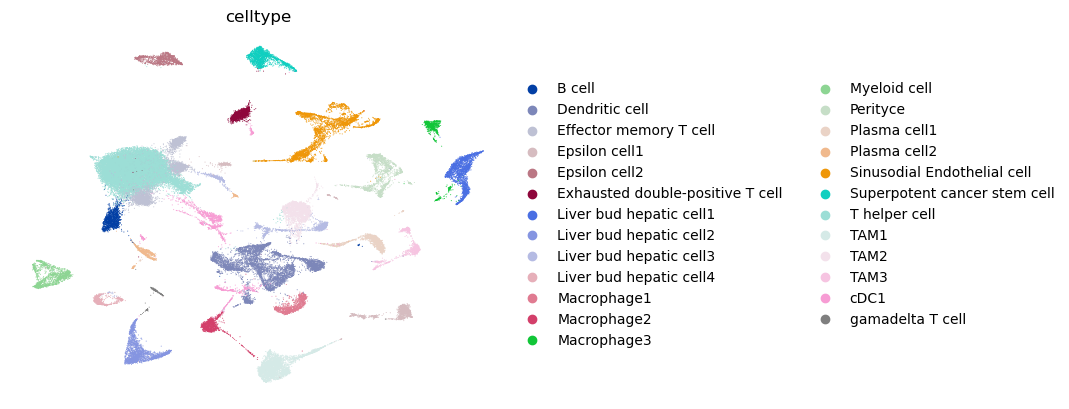

In [18]:
# plot a UMAP colored by sampleID to test:
sc.pl.umap(adata, color=['celltype'], frameon=False, save=True)


In [19]:
# save dataset as anndata format
adata.write('hcc.h5ad')

In [ ]:
# reload dataset
adata = sc.read_h5ad('my_data.h5ad')